In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(img, filter_mask):
    dft=np.fft.fft2(img)
    dft_shift=np.fft.fftshift(dft)
    filtered_dft=dft_shift*filter_mask
    f_ishift=np.fft.ifftshift(filtered_dft)
    img_back=np.fft.ifft2(f_ishift)
    return np.abs(img_back)

def create_distance_matrix(shape):
    P,Q=shape
    u=np.arange(P)
    v=np.arange(Q)
    u[u>P//2]-=P
    v[v>Q//2]-=Q
    V,U=np.meshgrid(v,u)
    D=np.sqrt(U**2+V**2)
    return D


In [2]:
img=cv2.imread("/content/Penguine.jpeg",0)
rows,cols=img.shape
D=create_distance_matrix((rows,cols))
D0=50 # Cutoff frequency


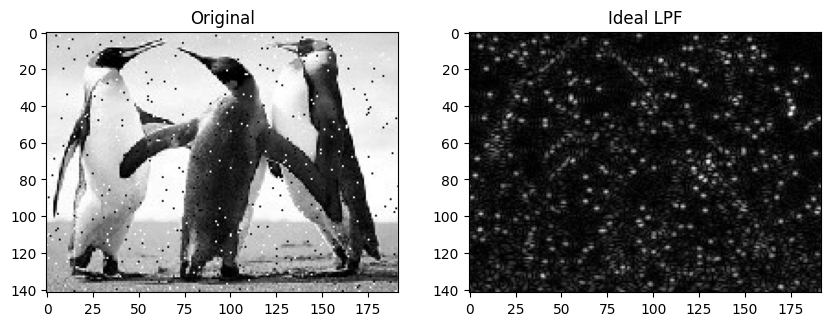

In [3]:
H_ILPF=(D<=D0).astype(np.float32)
result_ILPF=apply_filter(img,H_ILPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_ILPF,cmap='gray'),plt.title("Ideal LPF")
plt.show()


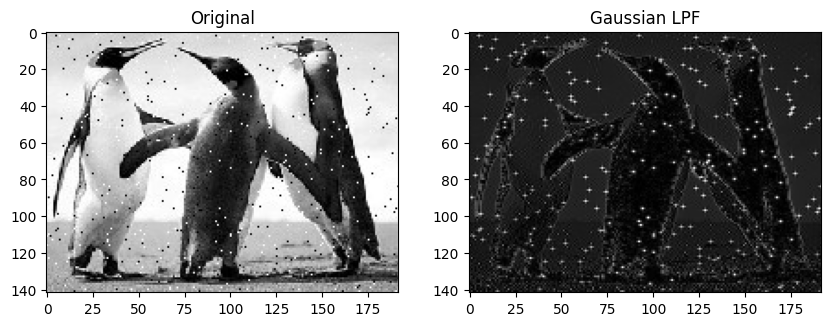

In [4]:
H_GLPF=np.exp(-(D**2)/(2*(D0**2)))
result_GLPF=apply_filter(img,H_GLPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_GLPF,cmap='gray'),plt.title("Gaussian LPF")
plt.show()


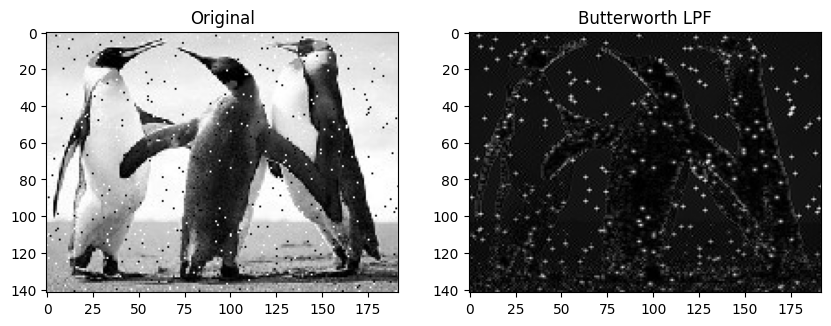

In [5]:
n=2 # Order
H_BLPF=1/(1+(D/D0)**(2*n))
result_BLPF=apply_filter(img,H_BLPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_BLPF,cmap='gray'),plt.title("Butterworth LPF")
plt.show()


In [6]:
img=cv2.imread("/content/CameraMan.jpeg",0)
rows,cols=img.shape
D=create_distance_matrix((rows,cols))
D0=30


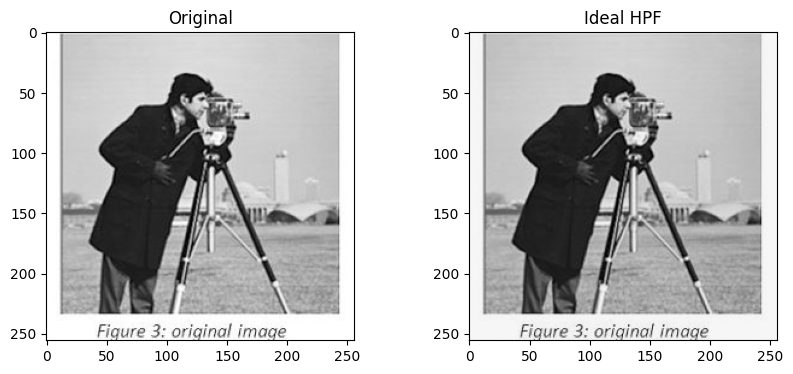

In [7]:
H_IHPF=(D>D0).astype(np.float32)
result_IHPF=apply_filter(img,H_IHPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_IHPF,cmap='gray'),plt.title("Ideal HPF")
plt.show()


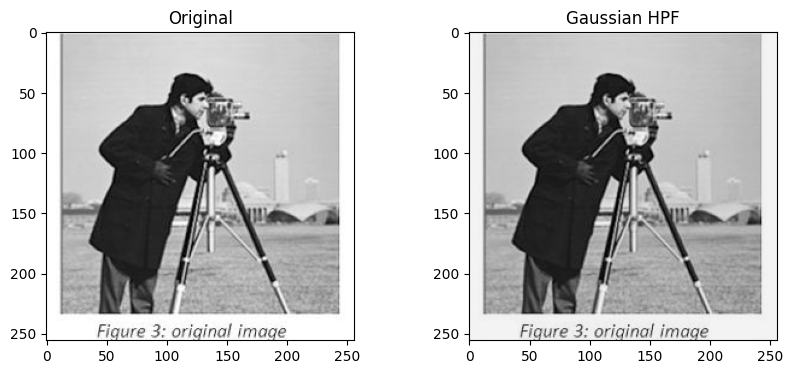

In [8]:
H_GHPF=1-np.exp(-(D**2)/(2*(D0**2)))
result_GHPF=apply_filter(img,H_GHPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_GHPF,cmap='gray'),plt.title("Gaussian HPF")
plt.show()


<ipython-input-9-75a5c2b65147>:2: RuntimeWarning: divide by zero encountered in divide
  H_BHPF=1/(1+(D0/D)**(2*n))


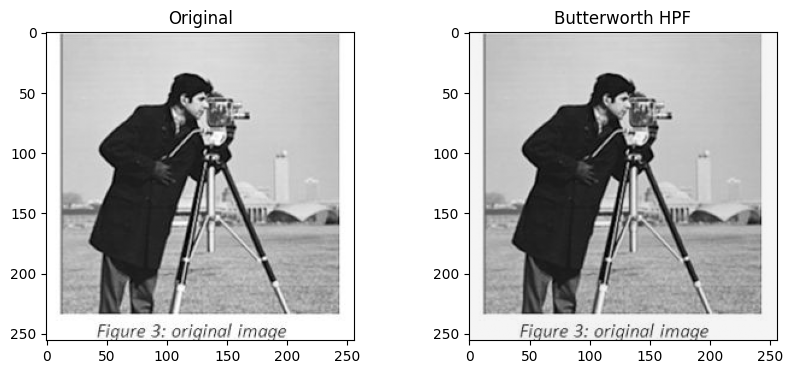

In [9]:
n=2
H_BHPF=1/(1+(D0/D)**(2*n))
H_BHPF[D==0]=0 # Avoid division by zero
result_BHPF=apply_filter(img,H_BHPF)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1),plt.imshow(img,cmap='gray'),plt.title("Original")
plt.subplot(1,2,2),plt.imshow(result_BHPF,cmap='gray'),plt.title("Butterworth HPF")
plt.show()
